# Bike Sharing Problem

## Read and understand the Data 

In [1]:
# import the library

import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the file
bike_share = pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_share.shape

(730, 16)

In [4]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Preparation

In [6]:
bike_share = bike_share.drop(['instant','dteday','casual','registered'],axis =1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# converting the columns into object datatype


bike_share['season'] = bike_share['season'].astype(str)
bike_share['weathersit'] = bike_share['weathersit'].astype(str)
bike_share['weekday'] = bike_share['weekday'].astype(str)
bike_share['mnth'] = bike_share['mnth'].astype(str)


In [8]:
# check for datatype
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


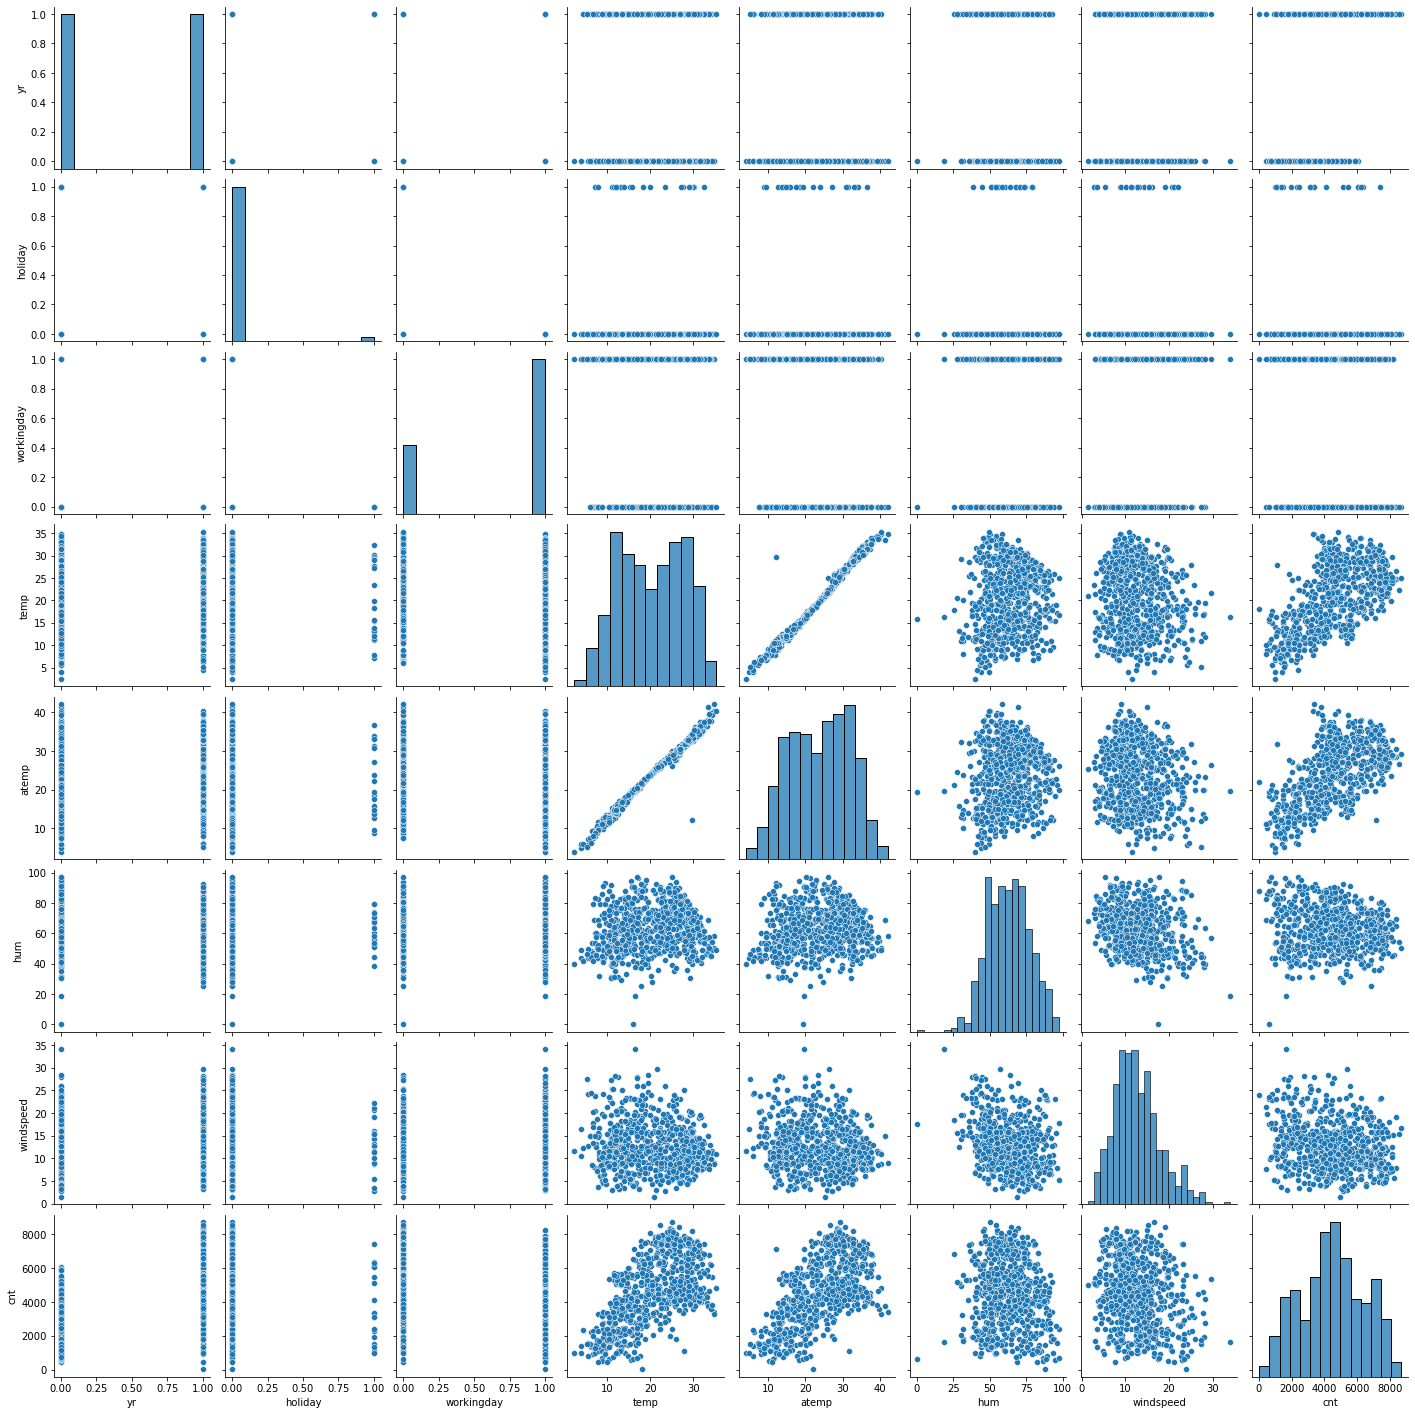

In [9]:
# visualising(contiuous variables)for correlations among the variables

num_var = sns.pairplot(bike_share)

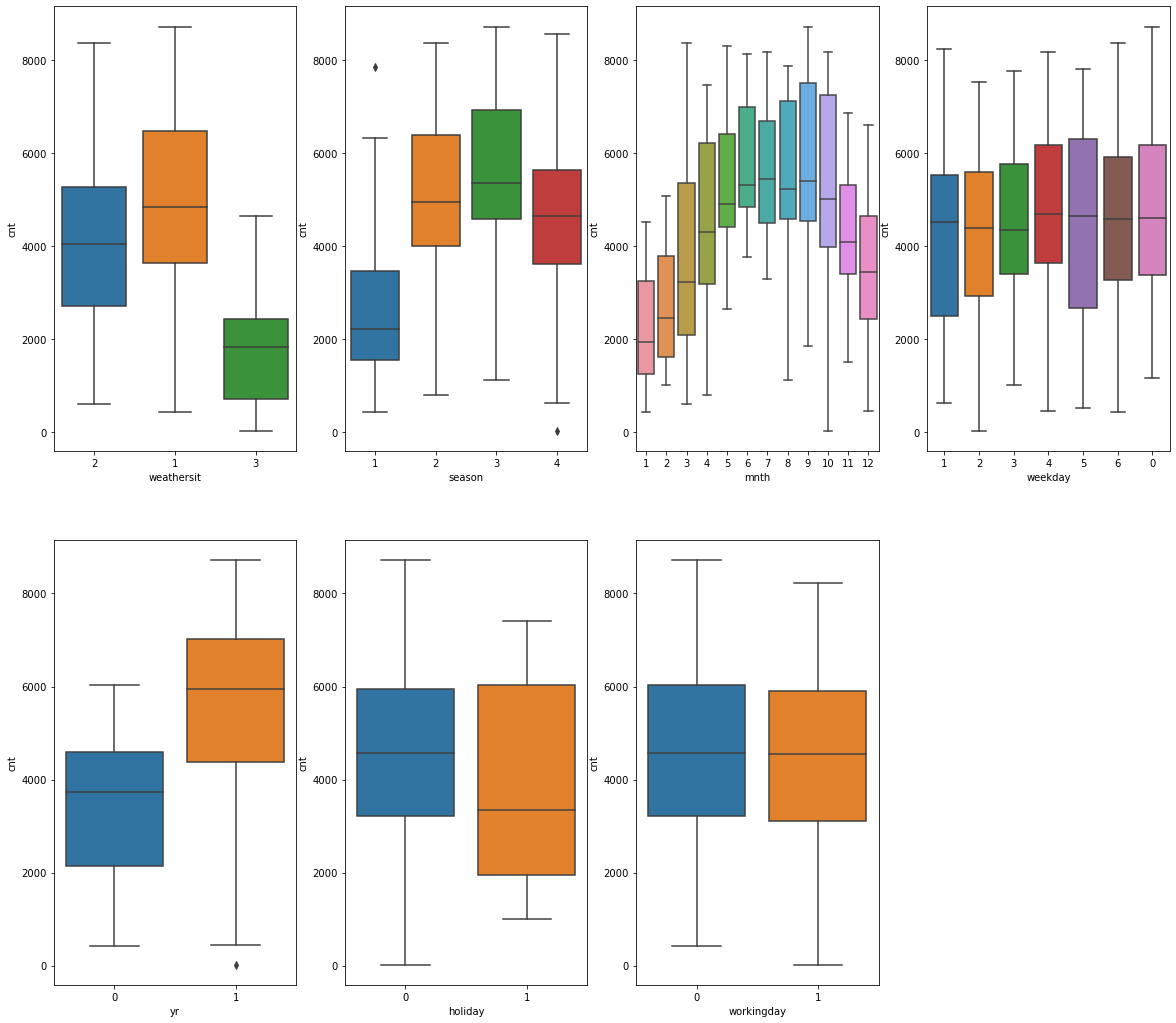

In [10]:
# categorical 

plt.figure(figsize =[20,18])
plt.subplot(2,4,1)
sns.boxplot(x='weathersit',y='cnt',data = bike_share)
plt.subplot(2,4,2)
sns.boxplot(x='season',y='cnt',data = bike_share)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data = bike_share)
plt.subplot(2,4,4)
sns.boxplot(x='weekday',y='cnt',data = bike_share)
plt.subplot(2,4,5)
sns.boxplot(x='yr',y='cnt',data=bike_share)
plt.subplot(2,4,6)
sns.boxplot(x='holiday',y='cnt',data=bike_share)
plt.subplot(2,4,7)
sns.boxplot(x='workingday',y='cnt',data=bike_share)

plt.show()

<AxesSubplot:>

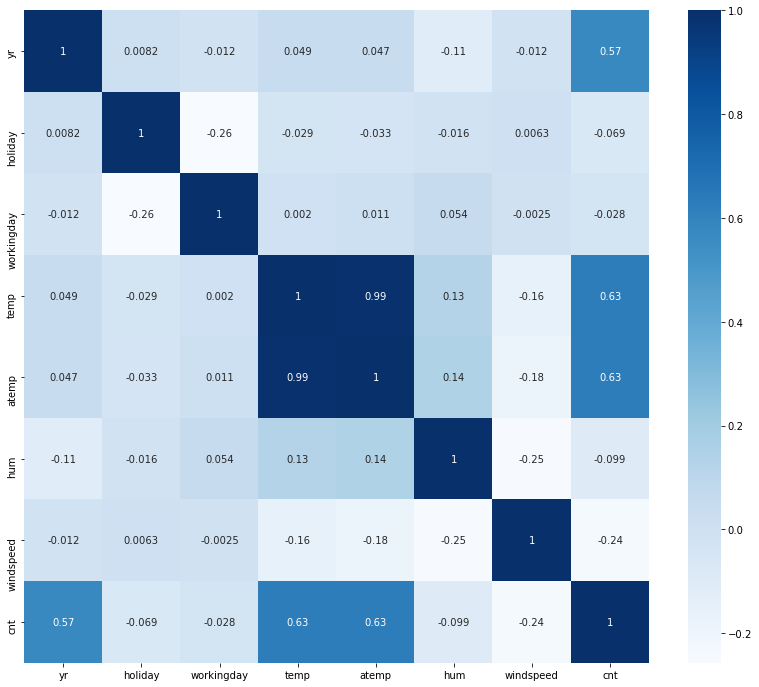

In [11]:
# correlation
plt.figure(figsize = [14,12])
sns.heatmap(bike_share.corr(),annot = True,cmap='Blues')

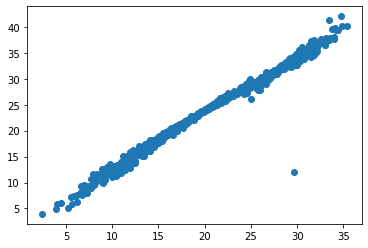

In [12]:
plt.scatter(x='temp',y='atemp',data = bike_share)
plt.show()

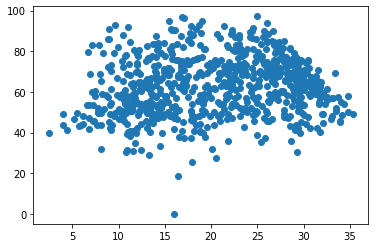

In [13]:
plt.scatter(x='temp',y='hum',data = bike_share)

In [14]:
# Drop 'atemp' because of high correlation
bike_share = bike_share.drop(['atemp'],axis =1)


In [15]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


## Dummy Variables

In [16]:
# dummy
status =pd.get_dummies(bike_share['season'], drop_first=True ,prefix ='season')
status_1 =pd.get_dummies(bike_share['weathersit'], drop_first=True ,prefix ='weathersit')
status_2 =pd.get_dummies(bike_share['mnth'], drop_first=True ,prefix ='mnth')
status_3 =pd.get_dummies(bike_share['weekday'], drop_first=True ,prefix ='weekday')


bike_share = pd.concat([bike_share,status,status_1,status_2,status_3],axis=1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [17]:
bike_share.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3', 'mnth_10', 'mnth_11',
       'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [18]:
# dropping redudant variables
bike_share=bike_share.drop(['weathersit','season','weekday','mnth'],axis=1)
bike_share.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
bike_share.shape

(730, 29)

## Splitting and Training the Model 

In [20]:
# splitting into test and train(first step of regression)
np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [21]:
bike_share.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

### Rescaling the Features

In [22]:
scaler = MinMaxScaler()
# apply scaling on all the columns except 'yes-no' & 'dummy'variables columns
num_var = ['temp','windspeed','hum','cnt']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,1,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,0,0


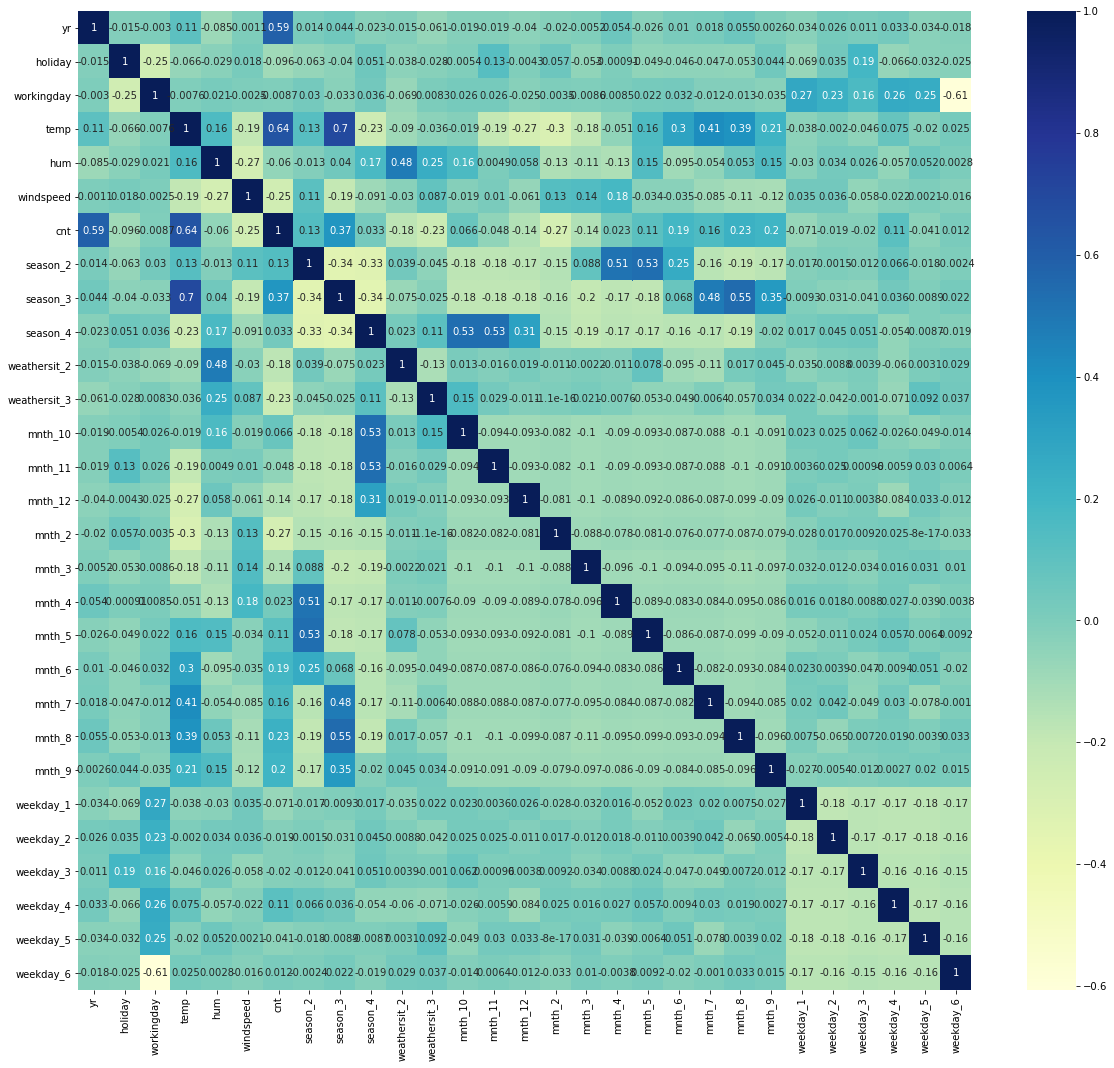

In [23]:
# corr

plt.figure(figsize = (20, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

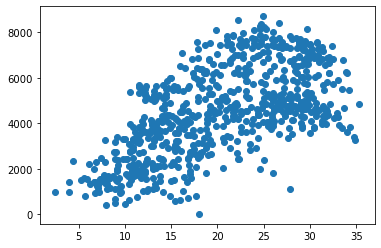

In [24]:
plt.scatter(x='temp',y='cnt',data = bike_share)

    ## Dividing into X and Y sets for the model building

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building our model

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,29)
rfe = rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1)]

In [28]:
# building the model using all the variables by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_10',
       'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [29]:
# creating X_test dataframes with RFE selected variables
X_train_rfe = X_train[col]

# adding a constant variables
X_train_rfe = sm.add_constant(X_train_rfe)

# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.33e-179
Time:                        20:33:12   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2373      0.030      7.865   

In [30]:
# dropping the insufficient var
X = X_train_rfe.drop('workingday',1,)

In [31]:
#add a constant
X_train_rfe = sm.add_constant(X)  
# running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.08e-180
Time:                        20:33:12   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     482   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2359      0.030      7.833   

In [32]:
# dropping the insufficient var
X = X.drop(['weekday_4','weekday_5','weekday_6','weekday_1'],axis =1)

#add a constant
X_train_rfe = sm.add_constant(X)

# running the linear model
lm_2 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.28e-182
Time:                        20:33:12   Log-Likelihood:                 519.90
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     486   BIC:                            -890.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2234      0.029      7.784   

In [33]:
# dropping the insufficient var(high P value)
X= X.drop(['mnth_2','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_10','mnth_11','mnth_12'],axis =1)

#add a constant
X_train_rfe = sm.add_constant(X)

# running the linear model
lm_3 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.44e-188
Time:                        20:33:12   Log-Likelihood:                 508.92
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     495   BIC:                            -924.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2191      0.027      8.036   

## calculating VIFs

In [34]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.23
7,season_3,5.34
3,temp,3.54
6,season_2,2.59
8,season_4,2.06
4,hum,1.91
9,weathersit_2,1.57
10,weathersit_3,1.25
5,windspeed,1.20
12,mnth_9,1.19


In [35]:
# dropping var with high p values first
X= X.drop(['weekday_3'],axis =1)

#add a constant
X_train_rfe = sm.add_constant(X)

# running the linear model
lm_4 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.83e-189
Time:                        20:33:12   Log-Likelihood:                 508.82
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2183      0.027      8.032   

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.02
7,season_3,5.34
3,temp,3.54
6,season_2,2.59
8,season_4,2.06
4,hum,1.91
9,weathersit_2,1.57
10,weathersit_3,1.25
5,windspeed,1.20
12,mnth_9,1.19


In [37]:
# model 4
# dropping var with high p values first
X= X.drop(['mnth_3'],axis =1)

#add a constant
X_train_rfe = sm.add_constant(X)

# running the linear model
lm_5 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.04e-189
Time:                        20:33:12   Log-Likelihood:                 506.91
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     497   BIC:                            -932.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2260      0.027      8.381   

In [38]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.05
7,season_3,5.09
3,temp,3.53
6,season_2,2.54
4,hum,1.90
8,season_4,1.88
9,weathersit_2,1.56
10,weathersit_3,1.25
5,windspeed,1.20
11,mnth_9,1.19


In [39]:
## model

X = X.drop(['season_3'],axis =1)

#add a constant
X_train_rfe = sm.add_constant(X)

# running the linear model
lm_6 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.14e-189
Time:                        20:33:13   Log-Likelihood:                 504.67
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     498   BIC:                            -934.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2243      0.027      8.295   

In [40]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.01
4,hum,1.87
8,weathersit_2,1.55
3,temp,1.27
7,season_4,1.26
9,weathersit_3,1.24
6,season_2,1.19
5,windspeed,1.18
10,mnth_9,1.11
1,yr,1.03


#### Final model

In [41]:
X = X.drop(['weekday_2'],axis =1)


#add a constant
X_train_rfe = sm.add_constant(X)

# running the linear model
lm_7 = sm.OLS(y_train,X_train_rfe).fit() 

# summary of the model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.80e-190
Time:                        20:33:13   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2256      0.027      8.314   

In [42]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.86
8,weathersit_2,1.55
3,temp,1.27
7,season_4,1.25
9,weathersit_3,1.23
6,season_2,1.19
5,windspeed,1.18
10,mnth_9,1.11
1,yr,1.03


## Residual analysis

In [43]:
y_train_price = lm_7.predict(X_train_rfe)

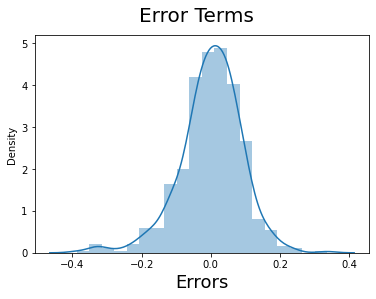

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()

## Making Predictions Using the Final Model

#### Applying Scaling on the test set

In [45]:
num_var = ['temp','windspeed','hum','cnt']

df_test[num_var] = scaler.transform(df_test[num_var])

df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,...,0.095890,0.105023,0.059361,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,...,0.295115,0.307285,0.236840,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [46]:
y_test = df_test.pop('cnt')
X_test = df_test

In [47]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [48]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4


X_test_m4 = X_test_m4.drop(['workingday','weekday_4','weekday_5','weekday_6','weekday_1','mnth_2','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8',
                            'mnth_10','mnth_11','mnth_12','weekday_3','mnth_3','season_3','weekday_2',], axis = 1)

In [49]:
X_test_m4.head()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_9
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,1,0,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0


In [50]:
# predict
y_test_pred = lm_7.predict(X_test_m4)

In [51]:
# evaluate(test)
r2_score(y_true = y_test,y_pred = y_test_pred)



0.8046410496371388

In [52]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.09632617103817209

Text(0, 0.5, 'y_pred')

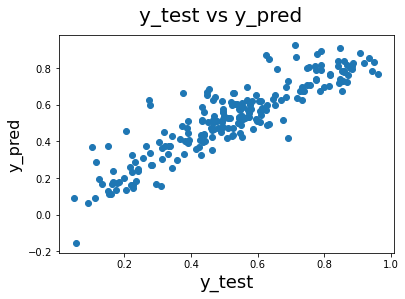

In [53]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Inferences

 since , final model have r2 equal to 83% and test has 80% it shows it is feasible model to predict the 'cnt'variable which symbolises the bike share company's demand in different situations.
 As, we can see there are variables with positive and negative coffiecents shows their effects on the demand.
 HOLIDAY,HUM,WEATHERSIT variables has negative coffecients which shows their neg impact on demand.

So, basically on holiday,hum day there is less demand compared to other days.while variables year, temp and other have positive coeff shows their positive impact on the demand of the bikes.